In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras


In [ ]:
from tensorflow.keras import Sequential


In [ ]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization


In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPool1D

In [ ]:

from tensorflow.keras.optimizers import Adam

In [ ]:
print(tf.__version__)

2.4.1


In [ ]:
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
cancer = datasets.load_breast_cancer()

In [ ]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [ ]:
X = pd.DataFrame(data = cancer.data, columns=cancer.feature_names)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y = cancer.target

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
X.shape

(569, 30)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [ ]:
X_train.shape

(455, 30)

In [ ]:
X_test.shape

(114, 30)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# from keras.utils import to_categorical
# #one-hot encode target column
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)
# y_train[:4]

In [ ]:
X_train = X_train.reshape(455,30,1)
X_test = X_test.reshape(114, 30, 1)

In [ ]:
epochs = 200
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='sigmoid', input_shape = (30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv1D(filters=64, kernel_size=2, activation='sigmoid', input_shape = (30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=128, kernel_size=2, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_16 (Batc (None, 29, 32)            128       
_________________________________________________________________
dropout_24 (Dropout)         (None, 29, 32)            0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_17 (Batc (None, 28, 64)            256       
_________________________________________________________________
dropout_25 (Dropout)         (None, 28, 64)            0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 27, 64)           

In [ ]:
model.compile(optimizer=Adam(lr=0.00005), loss = 'binary_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/200
15/15 [==============================] - 3s 42ms/step - loss: 0.9497 - accuracy: 0.4132 - val_loss: 0.8842 - val_accuracy: 0.3684
Epoch 2/200
15/15 [==============================] - 0s 24ms/step - loss: 0.8770 - accuracy: 0.4070 - val_loss: 0.8534 - val_accuracy: 0.3684
Epoch 3/200
15/15 [==============================] - 0s 23ms/step - loss: 0.8578 - accuracy: 0.4572 - val_loss: 0.8234 - val_accuracy: 0.3684
Epoch 4/200
15/15 [==============================] - 0s 23ms/step - loss: 0.7457 - accuracy: 0.5303 - val_loss: 0.7977 - val_accuracy: 0.3684
Epoch 5/200
15/15 [==============================] - 0s 23ms/step - loss: 0.7596 - accuracy: 0.4931 - val_loss: 0.7752 - val_accuracy: 0.3684
Epoch 6/200
15/15 [==============================] - 0s 22ms/step - loss: 0.7111 - accuracy: 0.5531 - val_loss: 0.7575 - val_accuracy: 0.3684
Epoch 7/200
15/15 [==============================] - 0s 24ms/step - loss: 0.6460 - accuracy: 0.6307 - val_loss: 0.7409 - val_accuracy: 0.3684
Epoch 

In [ ]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

In [ ]:
history.history

{'accuracy': [0.40219780802726746,
  0.4285714328289032,
  0.450549453496933,
  0.5296703577041626,
  0.5208791494369507,
  0.5538461804389954,
  0.6747252941131592,
  0.6571428775787354,
  0.6791208982467651,
  0.6857143044471741,
  0.7846153974533081,
  0.8065934181213379,
  0.800000011920929,
  0.8065934181213379,
  0.8307692408561707,
  0.8461538553237915,
  0.8571428656578064,
  0.8681318759918213,
  0.8571428656578064,
  0.8681318759918213,
  0.8769230842590332,
  0.8901098966598511,
  0.8637362718582153,
  0.8901098966598511,
  0.9120879173278809,
  0.8879120945930481,
  0.892307698726654,
  0.9054945111274719,
  0.898901104927063,
  0.9120879173278809,
  0.9098901152610779,
  0.9142857193946838,
  0.9274725317955017,
  0.9208791255950928,
  0.9274725317955017,
  0.9098901152610779,
  0.9428571462631226,
  0.9230769276618958,
  0.9450549483299255,
  0.9494505524635315,
  0.9362637400627136,
  0.9252747297286987,
  0.9494505524635315,
  0.9296703338623047,
  0.9384615421295166,
 

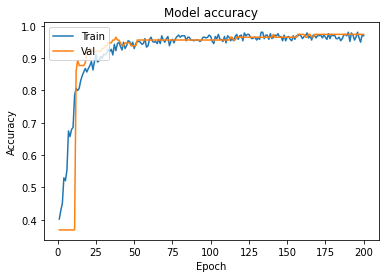

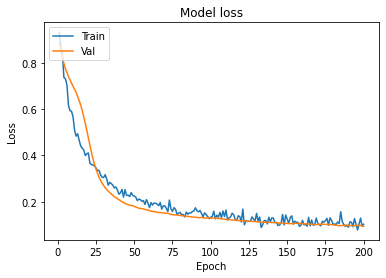

In [ ]:

plot_learningCurve(history, epochs)

In [ ]:
#predict first 4  in the test set
# model.predict(X_test[:4])

In [ ]:
# By using ReLu function
epochs = 200
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape = (30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape = (30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='relu'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_20 (Batc (None, 29, 32)            128       
_________________________________________________________________
dropout_30 (Dropout)         (None, 29, 32)            0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_21 (Batc (None, 28, 64)            256       
_________________________________________________________________
dropout_31 (Dropout)         (None, 28, 64)            0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 27, 64)           

In [ ]:
model.compile(optimizer=Adam(lr=0.00005), loss = 'binary_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/200
15/15 [==============================] - 2s 44ms/step - loss: 7.4979 - accuracy: 0.4444 - val_loss: 8.1834 - val_accuracy: 0.3684
Epoch 2/200
15/15 [==============================] - 0s 24ms/step - loss: 8.0488 - accuracy: 0.4242 - val_loss: 7.4786 - val_accuracy: 0.3684
Epoch 3/200
15/15 [==============================] - 0s 24ms/step - loss: 7.6657 - accuracy: 0.4314 - val_loss: 6.2594 - val_accuracy: 0.3684
Epoch 4/200
15/15 [==============================] - 0s 23ms/step - loss: 6.6318 - accuracy: 0.5035 - val_loss: 5.7307 - val_accuracy: 0.3684
Epoch 5/200
15/15 [==============================] - 0s 22ms/step - loss: 7.1158 - accuracy: 0.4515 - val_loss: 5.1053 - val_accuracy: 0.3684
Epoch 6/200
15/15 [==============================] - 0s 23ms/step - loss: 7.5231 - accuracy: 0.4559 - val_loss: 5.1942 - val_accuracy: 0.3684
Epoch 7/200
15/15 [==============================] - 0s 24ms/step - loss: 6.7372 - accuracy: 0.5026 - val_loss: 4.0257 - val_accuracy: 0.3684
Epoch 

In [ ]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

In [ ]:
history.history

{'accuracy': [0.41098901629447937,
  0.44395604729652405,
  0.42417582869529724,
  0.49450549483299255,
  0.45494505763053894,
  0.4571428596973419,
  0.48351648449897766,
  0.45274725556373596,
  0.44395604729652405,
  0.46373626589775085,
  0.4703296720981598,
  0.5032967329025269,
  0.5164835453033447,
  0.5076923370361328,
  0.5164835453033447,
  0.48351648449897766,
  0.5428571701049805,
  0.4923076927661896,
  0.5340659618377686,
  0.5362637639045715,
  0.5582417845726013,
  0.5230769515037537,
  0.5186813473701477,
  0.5714285969734192,
  0.5450549721717834,
  0.5604395866394043,
  0.5274725556373596,
  0.5318681597709656,
  0.5318681597709656,
  0.6065934300422668,
  0.5494505763053894,
  0.5494505763053894,
  0.5384615659713745,
  0.6043956279754639,
  0.5758242011070251,
  0.6263736486434937,
  0.6043956279754639,
  0.5604395866394043,
  0.58681321144104,
  0.5846154093742371,
  0.591208815574646,
  0.6021978259086609,
  0.6351648569107056,
  0.589011013507843,
  0.5604395866

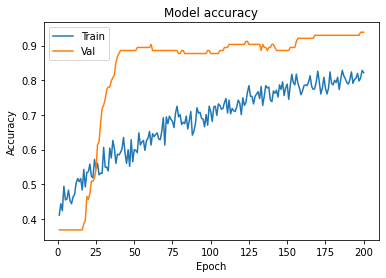

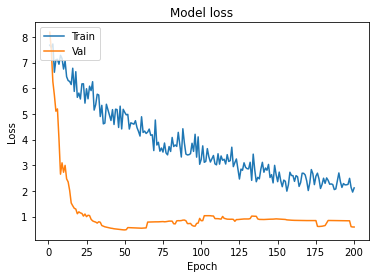

In [ ]:

plot_learningCurve(history, epochs)